In [9]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive


In [10]:

pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Expedia/Data/main.tsv.gz', compression='gzip', sep='\t', nrows=10000)

In [ ]:
df.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,impressions
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,"1,5695234,1,4.0,250.0,2.0,1,0,3,0,0|2,1734546,..."
1,002ba2a7c74dbffc32e4568af230d49a,25b8ebecb15b8f3edb5eed36a1f699b4,2021-06-23T03:39:00.000Z,1,1,0,50,2021-09-10,2021-09-14,2,0,0,1,PRICE ASCENDING,NaN,"1,5151135,0,null,null,null,1,1,1,0,0"
2,00c5152ed6ef5b937e8320a260bde084,349c86ff1be41553878e01988ca209d1,2021-06-10T00:08:00.000Z,1,1,0,49,2021-07-07,2021-07-12,2,0,0,1,RECOMMENDED,NaN,"1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0|2,5170759..."
3,00d5e2bca7962f67d5695e7e7b92feb8,d3b41f5d906b3f5e56bcafd4a7428634,2021-07-16T01:08:00.000Z,12,1,0,13,2021-08-25,2021-08-28,2,0,0,1,RECOMMENDED,NaN,"1,2391667,1,4.0,1625.0,5.0,0,0,5,0,0|2,4930059..."
4,013f92616fe583c4ba0c3919b69cf3d9,a359fd984e5ae5be64af5226dd1e9fe2,2021-07-07T20:49:00.000Z,1,1,0,206,2021-08-30,2021-09-04,1,0,0,1,RECOMMENDED,VIPONLY:FALSE,"1,6714720,1,5.0,225.0,3.0,1,0,5,0,0|2,5593294,..."


In [ ]:
df['applied_filters'].value_counts()

applied_filters
VIPONLY:FALSE                                                                   1133
MEALPLAN:ALL_INCLUSIVE                                                           235
PROPERTYNAME:XXX                                                                 126
POI:XXX                                                                           74
AMENITY:72                                                                        72
                                                                                ... 
AMENITY:66|TRAVELERTYPE:FAMILY|POI:XXX                                             1
AMENITY:66|TRAVELERTYPE:FAMILY|POI:XXX|MEALPLAN:FREE_BREAKFAST                     1
TRAVELERTYPE:FAMILY|POI:XXX|MEALPLAN:FREE_BREAKFAST                                1
AMENITY:14|STAR:4.0|POI:XXX|MEALPLAN:FREE_BREAKFAST                                1
STAR:5.0|CLEANINGANDSAFETYPRACTICES:ENHANCED_CLEANING|MEALPLAN:ALL_INCLUSIVE       1
Name: count, Length: 469, dtype: int64

In [ ]:
a = []
for i in df['applied_filters']:
  j = i.split('|')
  print(i)

AttributeError: 'float' object has no attribute 'split'

In [ ]:
df.shape

(10000, 16)

In [ ]:
df1 = df.iloc[:1000]
df1.shape

(1000, 16)

In [ ]:
df[df['applied_filters'].notna()].head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,impressions
4,013f92616fe583c4ba0c3919b69cf3d9,a359fd984e5ae5be64af5226dd1e9fe2,2021-07-07T20:49:00.000Z,1,1,0,206,2021-08-30,2021-09-04,1,0,0,1,RECOMMENDED,VIPONLY:FALSE,"1,6714720,1,5.0,225.0,3.0,1,0,5,0,0|2,5593294,..."
5,0152236295041a611d45ed97353d73df,cc8875772f124695111939cc8c08e59a,2021-06-10T14:49:00.000Z,2,1,1,9,2021-06-10,2021-06-11,2,0,0,1,RECOMMENDED,PRICE:0,"1,3894329,0,5.0,1025.0,3.0,0,1,4,0,0|2,2785866..."
14,018e7d1f2484459af14daf74d8aabb95,dd89d215b0a608de71666da440e3fdcc,2021-06-18T21:20:00.000Z,6,4,0,1,2021-08-01,2021-08-06,2,0,0,1,RECOMMENDED,VIPONLY:FALSE,"1,3955773,0,4.0,225.0,3.0,1,0,2,0,0|2,3091054,..."
16,022618a80fb6c8614855c66204e0e03b,daabcde78180d12e2f99dc933ae43e3c,2021-06-28T13:29:00.000Z,11,4,0,143,2021-08-19,2021-08-22,6,0,0,1,RECOMMENDED,MEALPLAN:ALL_INCLUSIVE,"1,6934307,0,0.0,0.0,null,0,0,null,0,0|2,512506..."
17,023fc9d701c799c627bb9fc68fa55816,197e29f822ed8ef83b9d339b892ced5e,2021-06-19T02:20:00.000Z,3,2,0,7811,2021-06-19,2021-06-20,2,0,0,1,RECOMMENDED,VIPONLY:FALSE,"1,6365186,0,5.0,475.0,4.0,0,0,5,0,0|2,2063282,..."


In [ ]:
df[df['impressions'].isna()]

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,impressions


In [ ]:
df['applied_filters'].notna().value_counts()

applied_filters
False    1728645
True      849164
Name: count, dtype: int64

In [ ]:
df['sort_type'].value_counts()

sort_type
RECOMMENDED                      2268515
PRICE ASCENDING                   243345
SPECIAL - DIRECT HOTEL SEARCH      17959
GUEST RATINGS DESCENDING           15399
STAR RATING DESCENDING             14468
DEALS                               9137
VACATION RENTAL                     8563
BEST_SELLER                          423
Name: count, dtype: int64

In [ ]:
len(df['applied_filters'].value_counts())

38914

In [ ]:
df['applied_filters'].value_counts()

applied_filters
VIPONLY:FALSE                                                                             334737
MEALPLAN:ALL_INCLUSIVE                                                                     44622
PROPERTYNAME:XXX                                                                           28925
AMENITY:17                                                                                 15148
AMENITY:72                                                                                 13998
                                                                                           ...  
LODGING:CONDO|LODGING:VACATIONHOME|LODGING:APARTHOTEL|LODGING:APARTMENT|LODGING:VILLA          1
AMENITY:19|AMENITY:27|AMENITY:14|PAYMENTTYPE:FREE_CANCELLATION|MEALPLAN:FREE_BREAKFAST         1
AMENITY:19|AMENITY:27|AMENITY:66|PAYMENTTYPE:FREE_CANCELLATION|MEALPLAN:FREE_BREAKFAST         1
STAR:4.0|PRICE:4|POI:XXX                                                                       1
STAR:5.0|PRICE

In [ ]:
len(df['point_of_sale'].value_counts())

179

In [ ]:
len(df['geo_location_country'].value_counts())

219

In [ ]:
len(df['destination_id'].value_counts())

71026

In [ ]:
df['is_mobile'].value_counts()

is_mobile
0    1464515
1    1113294
Name: count, dtype: int64

In [ ]:
impressions_test = df['impressions'][0]

In [ ]:
impressions_test = impressions_test.split('|')

In [ ]:
impressions_test

['1,5695234,1,4.0,250.0,2.0,1,0,3,0,0',
 '2,1734546,1,4.0,1000.0,2.0,1,0,4,0,0',
 '3,5675938,0,5.0,700.0,3.0,1,0,3,0,0',
 '4,5695234,0,4.0,250.0,2.0,1,0,3,0,0',
 '5,2012023,0,4.0,625.0,2.0,0,0,1,0,0',
 '6,309921,0,5.0,525.0,3.0,1,0,5,0,0',
 '7,2722643,0,4.0,75.0,3.0,1,1,2,1,0',
 '8,1734546,0,4.0,1000.0,2.0,1,0,4,0,0',
 '9,1197530,0,4.0,250.0,3.0,1,0,2,1,0',
 '10,2951009,0,4.0,575.0,2.0,1,1,4,0,0',
 '11,253160,0,4.0,650.0,3.0,1,0,5,0,0',
 '12,4869920,0,4.0,225.0,3.0,1,0,1,4,0',
 '13,1329950,0,5.0,225.0,3.0,1,0,4,0,0',
 '14,5608470,0,4.0,1025.0,2.0,0,0,4,0,0',
 '15,1866033,0,5.0,775.0,3.0,0,0,5,0,0',
 '16,465816,0,4.0,425.0,3.0,1,0,4,0,0',
 '17,6939020,0,4.0,50.0,3.0,1,0,2,0,0',
 '18,4510738,0,4.0,275.0,3.0,1,0,1,0,0',
 '19,1117381,0,5.0,25.0,3.0,1,0,5,0,0',
 '20,6907341,0,4.0,325.0,3.0,1,0,3,0,0',
 '21,4418490,0,4.0,225.0,3.0,1,0,4,0,0',
 '22,6794958,0,3.0,225.0,2.0,1,0,1,0,0',
 '23,2815253,0,4.0,150.0,3.0,1,1,1,0,0',
 '24,5168834,0,3.0,950.0,2.0,1,0,2,0,0',
 '25,5190616,0,4.0,1725.0,3.

In [ ]:
ranking = []
clicks = []
bookings = []
for i in df1['impressions']:
  a = i.split('|')
  for j in a:
    j=j.split(',')
    ranking.append(int(j[0]))
    clicks.append(int(j[-2]))
    bookings.append(int(j[-1]))

In [ ]:
#Not Sure if this works properly
sublist_r = []
sublist_c = []
sublist_b = []
sublists_rank = []
sublists_click = []
sublists_book = []

for i, value in enumerate(ranking):
    if value == 1 and i != 0:
        sublists_rank.append(sublist_r)
        sublists_click.append(sublist_c)
        sublists_book.append(sublist_b)
        sublist_r = []
        sublist_c = []
        sublist_b = []
    else:
        sublist_r.append(value)
        sublist_c.append(clicks[i])
        sublist_b.append(bookings[i])

# Append the last sublist
sublists_rank.append(sublist_r)
sublists_click.append(sublist_c)
sublists_book.append(sublist_b)

In [ ]:
sublist_r = []
sublist_c = []
sublist_b = []
sublists_rank = []
sublists_click = []
sublists_book = []

for i, value in enumerate(ranking):
    sublist_r.append(value)
    sublist_c.append(clicks[i])
    sublist_b.append(bookings[i])

    # Check if the next value is 1 or if it's the last value
    if (i < len(ranking) - 1 and ranking[i + 1] == 1) or i == len(ranking) - 1:
        sublists_rank.append(sublist_r)
        sublists_click.append(sublist_c)
        sublists_book.append(sublist_b)
        sublist_r = []
        sublist_c = []
        sublist_b = []

In [ ]:
#Not sure if this works properly
def compute_ndcg(rankings, clicks, bookings):
    """
    Compute Normalized Discounted Cumulative Gain (NDCG) for a list of rankings, clicks, and bookings.
    :param rankings: List of rankings for each search ID.
    :param clicks: List of clicks for each search ID.
    :param bookings: List of bookings for each search ID.
    :return: NDCG for each search ID and average NDCG.
    """
    ndcg_scores = []
    for rank, click, booking in zip(rankings, clicks, bookings):
        # Calculate relevance scores based on clicks and bookings
        relevance = np.where(booking > 0, 2 * booking, np.where(click > 0, click, 0))

        # Calculate Discounted Cumulative Gain (DCG)
        dcg = np.sum(relevance / np.log2(np.arange(2, len(rank) + 2)))

        # Calculate Ideal DCG (IDCG)
        ideal_relevance = sorted(relevance, reverse=True)
        idcg = np.sum(ideal_relevance / np.log2(np.arange(2, len(rank) + 2)))

        # Calculate NDCG
        if idcg == 0:  # Handle the case when all items have relevance score 0
            ndcg = 0
        else:
            ndcg = dcg / idcg
        ndcg_scores.append(ndcg)

    avg_ndcg = np.mean(ndcg_scores)
    return ndcg_scores, avg_ndcg

In [ ]:
def compute_ndcg(rankings, clicks, bookings):
    """
    Compute Normalized Discounted Cumulative Gain (NDCG) for a list of rankings, clicks, and bookings.
    :param rankings: List of rankings for each search ID.
    :param clicks: List of clicks for each search ID.
    :param bookings: List of bookings for each search ID.
    :return: NDCG for each search ID and average NDCG.
    """
    ndcg_scores = []
    for rank, click, booking_list in zip(rankings, clicks, bookings):
        # Calculate relevance scores based on clicks and bookings
        relevance = []
        for booking, click_count in zip(booking_list, click):
            if booking > 0:
                relevance.append(2 * booking)
            elif click_count > 0:
                relevance.append(click_count)
            else:
                relevance.append(0)

        # Calculate Discounted Cumulative Gain (DCG)
        dcg = np.sum(relevance / np.log2(np.arange(2, len(rank) + 2)))

        # Calculate Ideal DCG (IDCG)
        ideal_relevance = sorted(relevance, reverse=True)
        idcg = np.sum(ideal_relevance / np.log2(np.arange(2, len(rank) + 2)))

        # Calculate NDCG
        if idcg == 0:  # Handle the case when all items have relevance score 0
            ndcg = 0
        else:
            ndcg = dcg / idcg
        ndcg_scores.append(ndcg)

    avg_ndcg = np.mean(ndcg_scores)
    return ndcg_scores, avg_ndcg

In [ ]:
ndcg_scores, avg_ndcg = compute_ndcg(sublists_rank, sublists_click, sublists_book)

In [ ]:
avg_ndcg

0.14019837425530177

In [ ]:
np.arange(2,10)

array([2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
len(ndcg_scores)

249122

In [ ]:
#Booking = 2
#Click = 1
avg_ndcg

0.12658645925386358

#EXPLODING AND CONCATENATING FEATURES

In [ ]:
df1.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,impressions
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,"1,5695234,1,4.0,250.0,2.0,1,0,3,0,0|2,1734546,..."
1,002ba2a7c74dbffc32e4568af230d49a,25b8ebecb15b8f3edb5eed36a1f699b4,2021-06-23T03:39:00.000Z,1,1,0,50,2021-09-10,2021-09-14,2,0,0,1,PRICE ASCENDING,NaN,"1,5151135,0,null,null,null,1,1,1,0,0"
2,00c5152ed6ef5b937e8320a260bde084,349c86ff1be41553878e01988ca209d1,2021-06-10T00:08:00.000Z,1,1,0,49,2021-07-07,2021-07-12,2,0,0,1,RECOMMENDED,NaN,"1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0|2,5170759..."
3,00d5e2bca7962f67d5695e7e7b92feb8,d3b41f5d906b3f5e56bcafd4a7428634,2021-07-16T01:08:00.000Z,12,1,0,13,2021-08-25,2021-08-28,2,0,0,1,RECOMMENDED,NaN,"1,2391667,1,4.0,1625.0,5.0,0,0,5,0,0|2,4930059..."
4,013f92616fe583c4ba0c3919b69cf3d9,a359fd984e5ae5be64af5226dd1e9fe2,2021-07-07T20:49:00.000Z,1,1,0,206,2021-08-30,2021-09-04,1,0,0,1,RECOMMENDED,VIPONLY:FALSE,"1,6714720,1,5.0,225.0,3.0,1,0,5,0,0|2,5593294,..."


In [ ]:
def preprocess_and_explode(row):
    impressions_list = row['impressions'].split('|')
    new_rows = []
    for impression_group in impressions_list:
        impressions = impression_group.split(',')
        new_row = row.copy()  # Copy the original row data
        for i, impression_value in enumerate(impressions):
            new_row[f'impression_{i+1}'] = impression_value
        new_rows.append(new_row)
    return pd.DataFrame(new_rows)

In [ ]:
# Explode the DataFrame by 'impressions' column
exploded_df = pd.concat([preprocess_and_explode(row) for _, row in df1.iterrows()], ignore_index=True)

# Drop the original 'impressions' column
exploded_df.drop(columns=['impressions'], inplace=True)

In [ ]:
exploded_df = pd.DataFrame(exploded_df)
exploded_df.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,...,impression_2,impression_3,impression_4,impression_5,impression_6,impression_7,impression_8,impression_9,impression_10,impression_11
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,5695234,1,4.0,250.0,2.0,1,0,3,0,0
1,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,1734546,1,4.0,1000.0,2.0,1,0,4,0,0
2,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,5675938,0,5.0,700.0,3.0,1,0,3,0,0
3,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,5695234,0,4.0,250.0,2.0,1,0,3,0,0
4,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,2012023,0,4.0,625.0,2.0,0,0,1,0,0


In [ ]:
exploded_df.rename(columns={'impression_1':'rank', 'impression_2':'prop_id','impression_3':'is_travel_ad','impression_4':'review_rating','impression_5':'review_count',
                            'impression_6':'star_rating', 'impression_7':'is_free_cancellation','impression_8':'is_drr','impression_9':'price_bucket','impression_10':'num_clicks',
                            'impression_11':'is_trans'}, inplace=True)
exploded_df.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,...,prop_id,is_travel_ad,review_rating,review_count,star_rating,is_free_cancellation,is_drr,price_bucket,num_clicks,is_trans
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,5695234,1,4.0,250.0,2.0,1,0,3,0,0
1,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,1734546,1,4.0,1000.0,2.0,1,0,4,0,0
2,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,5675938,0,5.0,700.0,3.0,1,0,3,0,0
3,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,5695234,0,4.0,250.0,2.0,1,0,3,0,0
4,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,2012023,0,4.0,625.0,2.0,0,0,1,0,0


In [ ]:
exploded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71307 entries, 0 to 71306
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user_id               71307 non-null  object
 1   search_id             71307 non-null  object
 2   search_timestamp      71307 non-null  object
 3   point_of_sale         71307 non-null  int64 
 4   geo_location_country  71307 non-null  int64 
 5   is_mobile             71307 non-null  int64 
 6   destination_id        71307 non-null  int64 
 7   checkin_date          71307 non-null  object
 8   checkout_date         71307 non-null  object
 9   adult_count           71307 non-null  int64 
 10  child_count           71307 non-null  int64 
 11  infant_count          71307 non-null  int64 
 12  room_count            71307 non-null  int64 
 13  sort_type             71307 non-null  object
 14  applied_filters       14424 non-null  object
 15  rank                  71307 non-null

In [ ]:
columns_converted = ['rank', 'prop_id', 'is_travel_ad', 'review_rating', 'review_count', 'star_rating',
                     'is_free_cancellation', 'is_drr', 'price_bucket', 'num_clicks', 'is_trans']

for i in columns_converted:
  exploded_df[i] = exploded_df[i].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [ ]:
exploded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71307 entries, 0 to 71306
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               71307 non-null  object 
 1   search_id             71307 non-null  object 
 2   search_timestamp      71307 non-null  object 
 3   point_of_sale         71307 non-null  int64  
 4   geo_location_country  71307 non-null  int64  
 5   is_mobile             71307 non-null  int64  
 6   destination_id        71307 non-null  int64  
 7   checkin_date          71307 non-null  object 
 8   checkout_date         71307 non-null  object 
 9   adult_count           71307 non-null  int64  
 10  child_count           71307 non-null  int64  
 11  infant_count          71307 non-null  int64  
 12  room_count            71307 non-null  int64  
 13  sort_type             71307 non-null  object 
 14  applied_filters       14424 non-null  object 
 15  rank               

In [11]:
df_amenities = pd.read_csv('/content/drive/MyDrive/Expedia/Data/amenities.tsv.gz', compression='gzip', sep='\t')

In [ ]:
df_amenities.head()

,prop_id,AirConditioning,AirportTransfer,Bar,FreeAirportTransportation,FreeBreakfast,FreeParking,FreeWiFi,Gym,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi
0,3,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,11,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,16,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,23,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_amenities.shape

(1496803, 19)

In [ ]:
df_amenities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496803 entries, 0 to 1496802
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype
---  ------                     --------------    -----
 0   prop_id                    1496803 non-null  int64
 1   AirConditioning            1496803 non-null  int64
 2   AirportTransfer            1496803 non-null  int64
 3   Bar                        1496803 non-null  int64
 4   FreeAirportTransportation  1496803 non-null  int64
 5   FreeBreakfast              1496803 non-null  int64
 6   FreeParking                1496803 non-null  int64
 7   FreeWiFi                   1496803 non-null  int64
 8   Gym                        1496803 non-null  int64
 9   HighSpeedInternet          1496803 non-null  int64
 10  HotTub                     1496803 non-null  int64
 11  LaundryFacility            1496803 non-null  int64
 12  Parking                    1496803 non-null  int64
 13  PetsAllowed                1496803 non-nul

In [ ]:
exploded_df_merged = exploded_df.merge(df_amenities, on='prop_id', how='left')

In [ ]:
exploded_df_merged.shape

(71307, 44)

In [ ]:
exploded_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71307 entries, 0 to 71306
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    71307 non-null  object 
 1   search_id                  71307 non-null  object 
 2   search_timestamp           71307 non-null  object 
 3   point_of_sale              71307 non-null  int64  
 4   geo_location_country       71307 non-null  int64  
 5   is_mobile                  71307 non-null  int64  
 6   destination_id             71307 non-null  int64  
 7   checkin_date               71307 non-null  object 
 8   checkout_date              71307 non-null  object 
 9   adult_count                71307 non-null  int64  
 10  child_count                71307 non-null  int64  
 11  infant_count               71307 non-null  int64  
 12  room_count                 71307 non-null  int64  
 13  sort_type                  71307 non-null  obj

In [ ]:
exploded_df_merged.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,...,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
file_path = '/content/drive/My Drive/Expedia/Data/exploded_df_merged_amenities.csv'
exploded_df_merged.to_csv(file_path, index=False)

In [ ]:
exploded_df_merged.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,...,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [12]:
df_merged = pd.read_csv('/content/drive/MyDrive/Expedia/Data/exploded_df_merged_amenities.csv')

In [13]:
df_merged.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,rank,prop_id,is_travel_ad,review_rating,review_count,star_rating,is_free_cancellation,is_drr,price_bucket,num_clicks,is_trans,AirConditioning,AirportTransfer,Bar,FreeAirportTransportation,FreeBreakfast,FreeParking,FreeWiFi,Gym,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,1,5695234,1,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,2,1734546,1,4.0,1000.0,2.0,1,0,4.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,3,5675938,0,5.0,700.0,3.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,4,5695234,0,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,5,2012023,0,4.0,625.0,2.0,0,0,1.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [14]:
df_amenities.columns

Index(['prop_id', 'AirConditioning', 'AirportTransfer', 'Bar',
       'FreeAirportTransportation', 'FreeBreakfast', 'FreeParking', 'FreeWiFi',
       'Gym', 'HighSpeedInternet', 'HotTub', 'LaundryFacility', 'Parking',
       'PetsAllowed', 'PrivatePool', 'SpaServices', 'SwimmingPool',
       'WasherDryer', 'WiFi'],
      dtype='object')

In [15]:
for i in df_amenities.columns:
  df_merged[i] = df_merged[i].fillna(0)

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71307 entries, 0 to 71306
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    71307 non-null  object 
 1   search_id                  71307 non-null  object 
 2   search_timestamp           71307 non-null  object 
 3   point_of_sale              71307 non-null  int64  
 4   geo_location_country       71307 non-null  int64  
 5   is_mobile                  71307 non-null  int64  
 6   destination_id             71307 non-null  int64  
 7   checkin_date               71307 non-null  object 
 8   checkout_date              71307 non-null  object 
 9   adult_count                71307 non-null  int64  
 10  child_count                71307 non-null  int64  
 11  infant_count               71307 non-null  int64  
 12  room_count                 71307 non-null  int64  
 13  sort_type                  71307 non-null  obj

In [16]:
df_merged.fillna(0, inplace=True)

In [17]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71307 entries, 0 to 71306
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    71307 non-null  object 
 1   search_id                  71307 non-null  object 
 2   search_timestamp           71307 non-null  object 
 3   point_of_sale              71307 non-null  int64  
 4   geo_location_country       71307 non-null  int64  
 5   is_mobile                  71307 non-null  int64  
 6   destination_id             71307 non-null  int64  
 7   checkin_date               71307 non-null  object 
 8   checkout_date              71307 non-null  object 
 9   adult_count                71307 non-null  int64  
 10  child_count                71307 non-null  int64  
 11  infant_count               71307 non-null  int64  
 12  room_count                 71307 non-null  int64  
 13  sort_type                  71307 non-null  obj

In [ ]:
df_merged.head()


,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,rank,prop_id,is_travel_ad,review_rating,review_count,star_rating,is_free_cancellation,is_drr,price_bucket,num_clicks,is_trans,AirConditioning,AirportTransfer,Bar,FreeAirportTransportation,FreeBreakfast,FreeParking,FreeWiFi,Gym,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,1,5695234,1,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,2,1734546,1,4.0,1000.0,2.0,1,0,4.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,3,5675938,0,5.0,700.0,3.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,4,5695234,0,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,5,2012023,0,4.0,625.0,2.0,0,0,1.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#CREATING SVMLIGHT FILE


# CREATION OF XGBOOST MODEL

In [18]:
from sklearn.datasets import dump_svmlight_file
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [ ]:
df2 = df_merged.copy()
scaler=StandardScaler()
unique_search_ids = df2['search_id'].unique()
id_mapping = {search_id: i for i, search_id in enumerate(unique_search_ids)}
df2['search_id'] = df2['search_id'].map(id_mapping)

In [ ]:
df2.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,rank,prop_id,is_travel_ad,review_rating,review_count,star_rating,is_free_cancellation,is_drr,price_bucket,num_clicks,is_trans,AirConditioning,AirportTransfer,Bar,FreeAirportTransportation,FreeBreakfast,FreeParking,FreeWiFi,Gym,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi
0,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,1,5695234,1,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,2,1734546,1,4.0,1000.0,2.0,1,0,4.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,3,5675938,0,5.0,700.0,3.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,4,5695234,0,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,5,2012023,0,4.0,625.0,2.0,0,0,1.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df2.shape

(71307, 44)

In [ ]:
df2['search_id'].nunique()

997

In [ ]:
df2 = df2[['search_id','price_bucket', 'review_rating', 'review_count', 'star_rating','sort_type', 'num_clicks']]


numerical_features = ['price_bucket', 'review_rating', 'review_count', 'star_rating']
df2[numerical_features] = scaler.fit_transform(df2[numerical_features])

categorical_features = ['sort_type']
df2 = pd.get_dummies(df2, columns=categorical_features)

query_id = df2['search_id']

file_path = 'dataset_xgboost.svmlight'

X = df2.drop(columns=['num_clicks', 'search_id'])
y = df2['num_clicks']

dump_svmlight_file(X, y, f=file_path, query_id=query_id)

In [ ]:
params = {
    'objective': 'rank:ndcg',  # Use rank:ndcg for list-wise ranking
    'eta': 0.1,
    'gamma': 1.0,
    # Add other parameters as needed
}

features_data = xgb.DMatrix('dataset_xgboost.svmlight?format=libsvm')

In [ ]:
model = xgb.train(params, features_data)

In [ ]:
eval_results = model.eval(features_data)
print("Evaluation results:", eval_results)

Evaluation results: [0]	eval-ndcg@32:0.89929496229472061


In [ ]:
df2 = df_merged.copy()
scaler=StandardScaler()
unique_search_ids = df2['search_id'].unique()
id_mapping = {search_id: i for i, search_id in enumerate(unique_search_ids)}
df2['search_id'] = df2['search_id'].map(id_mapping)

In [ ]:
df2.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,rank,prop_id,is_travel_ad,review_rating,review_count,star_rating,is_free_cancellation,is_drr,price_bucket,num_clicks,is_trans,AirConditioning,AirportTransfer,Bar,FreeAirportTransportation,FreeBreakfast,FreeParking,FreeWiFi,Gym,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi
0,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,1,5695234,1,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,2,1734546,1,4.0,1000.0,2.0,1,0,4.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,3,5675938,0,5.0,700.0,3.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,4,5695234,0,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,5,2012023,0,4.0,625.0,2.0,0,0,1.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df2.groupby('search_id').agg({'num_clicks':'sum'})['num_clicks'].value_counts()

num_clicks
0      783
1      121
2       45
3       13
4       11
6        7
5        6
10       4
7        2
9        1
12       1
8        1
100      1
67       1
Name: count, dtype: int64

In [ ]:
df2.columns

Index(['search_id', 'price_bucket', 'review_rating', 'review_count',
       'star_rating', 'sort_type', 'num_clicks'],
      dtype='object')

In [ ]:
df_merged.groupby('search_id').agg({'is_trans':'sum'})['is_trans'].value_counts()

is_trans
0     969
1      22
2       4
70      1
8       1
Name: count, dtype: int64

In [ ]:
df2 = df2[['search_id','price_bucket', 'review_rating', 'review_count', 'star_rating','sort_type', 'num_clicks']]
X = df2.drop(columns=['num_clicks'])
y = df2['num_clicks']
X.head()

,search_id,price_bucket,review_rating,review_count,star_rating,sort_type
0,0,3.0,4.0,250.0,2.0,RECOMMENDED
1,0,4.0,4.0,1000.0,2.0,RECOMMENDED
2,0,3.0,5.0,700.0,3.0,RECOMMENDED
3,0,3.0,4.0,250.0,2.0,RECOMMENDED
4,0,1.0,4.0,625.0,2.0,RECOMMENDED


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_val.shape

((57045, 6), (14262, 6))

In [ ]:
numerical_features = ['price_bucket', 'review_rating', 'review_count', 'star_rating']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

categorical_features = ['sort_type']
X_train = pd.get_dummies(X_train, columns=categorical_features)

query_id_train = X_train['search_id']


In [ ]:
X_train.drop(columns=['search_id'], inplace=True)

In [ ]:
X_train.head()

,price_bucket,review_rating,review_count,star_rating,sort_type_GUEST RATINGS DESCENDING,sort_type_PRICE ASCENDING,sort_type_RECOMMENDED,sort_type_SPECIAL - DIRECT HOTEL SEARCH,sort_type_STAR RATING DESCENDING,sort_type_VACATION RENTAL
65654,-1.228340,0.844025,-0.375801,-1.489481,False,False,True,False,False,False
48262,1.009517,0.844025,0.022278,0.264824,False,False,True,False,False,False
24253,-0.109412,0.209362,0.221318,0.264824,False,False,True,False,False,False
30228,-1.228340,0.844025,-0.345180,-1.489481,False,False,True,False,False,False
38615,-0.668876,0.209362,0.313183,0.264824,False,False,True,False,False,False


In [ ]:
numerical_features = ['price_bucket', 'review_rating', 'review_count', 'star_rating']
X_val[numerical_features] = scaler.transform(X_val[numerical_features])

categorical_features = ['sort_type']
X_val = pd.get_dummies(X_val, columns=categorical_features)

query_id_val = X_val['search_id']

In [ ]:
X_val.drop(columns=['search_id'], inplace=True)

In [ ]:
X_val.head()

,price_bucket,review_rating,review_count,star_rating,sort_type_GUEST RATINGS DESCENDING,sort_type_PRICE ASCENDING,sort_type_RECOMMENDED,sort_type_SPECIAL - DIRECT HOTEL SEARCH,sort_type_STAR RATING DESCENDING,sort_type_VACATION RENTAL
53539,-0.668876,-0.425300,-0.391112,0.264824,False,False,True,False,False,False
67522,1.568981,0.209362,0.221318,0.264824,False,True,False,False,False,False
64132,1.009517,0.844025,0.006968,1.434362,False,False,True,False,False,False
36847,1.009517,0.209362,0.221318,0.849593,False,False,True,False,False,False
38580,-0.109412,-0.425300,1.936124,0.849593,False,False,True,False,False,False


In [ ]:
file_path = 'train_xgboost2.svmlight'
dump_svmlight_file(X_train, y_train, f=file_path, query_id=query_id_train)

file_path = 'val_xgboost2.svmlight'
dump_svmlight_file(X_val, y_val, f=file_path, query_id=query_id_val)

In [ ]:
params = {
    'objective': 'rank:ndcg',  # Use rank:ndcg for list-wise ranking
    'eta': 0.1,
    'gamma': 1.0,
    # Add other parameters as needed
}

train_dm_xgboost = xgb.DMatrix('train_xgboost2.svmlight?format=libsvm')

model = xgb.train(params, train_dm_xgboost)

In [ ]:
val_dm_xgboost = xgb.DMatrix('val_xgboost2.svmlight?format=libsvm')

eval_results = model.eval(val_dm_xgboost)

In [ ]:
eval_results

'[0]\teval-ndcg@32:1.00000000000000000'

In [ ]:
val_dm_xgboost = xgb.DMatrix('val_xgboost2.svmlight?format=libsvm')

predictions = model.predict(val_dm_xgboost)

In [ ]:
len(y_val)

14262

In [ ]:
len(predictions)

14262

In [ ]:
np.unique(y_val, return_counts=True)

(array([0, 1, 2, 3, 4]), array([14129,   119,     9,     3,     2]))

In [ ]:
np.unique(predictions, return_counts=True)

(array([0.], dtype=float32), array([14262]))

In [ ]:
predictions[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

# SHOULD WE EXPECT RANK FROM THE PREDICTIONS?
Right now we are getting number of clicks



In [ ]:
df2.head()

,search_id,price_bucket,review_rating,review_count,star_rating,num_clicks,sort_type_GUEST RATINGS DESCENDING,sort_type_PRICE ASCENDING,sort_type_RECOMMENDED,sort_type_SPECIAL - DIRECT HOTEL SEARCH,sort_type_STAR RATING DESCENDING,sort_type_VACATION RENTAL
0,0,0.449596,0.209851,-0.252946,-0.318869,0,False,False,True,False,False,False
1,0,1.009330,0.209851,0.213110,-0.318869,0,False,False,True,False,False,False
2,0,0.449596,0.843883,0.026688,0.266021,0,False,False,True,False,False,False
3,0,0.449596,0.209851,-0.252946,-0.318869,0,False,False,True,False,False,False
4,0,-0.669872,0.209851,-0.019918,-0.318869,0,False,False,True,False,False,False


#Creating Ideal Ranking Column

In [19]:
df_merged.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,rank,prop_id,is_travel_ad,review_rating,review_count,star_rating,is_free_cancellation,is_drr,price_bucket,num_clicks,is_trans,AirConditioning,AirportTransfer,Bar,FreeAirportTransportation,FreeBreakfast,FreeParking,FreeWiFi,Gym,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,1,5695234,1,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,2,1734546,1,4.0,1000.0,2.0,1,0,4.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,3,5675938,0,5.0,700.0,3.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,4,5695234,0,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,5,2012023,0,4.0,625.0,2.0,0,0,1.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [20]:
df3 = df_merged.copy()

In [21]:
df3['relevance'] = df3['num_clicks'] + 2 * df3['is_trans']

In [22]:
df3.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,rank,prop_id,is_travel_ad,review_rating,review_count,star_rating,is_free_cancellation,is_drr,price_bucket,num_clicks,is_trans,AirConditioning,AirportTransfer,Bar,FreeAirportTransportation,FreeBreakfast,FreeParking,FreeWiFi,Gym,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi,relevance
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,1,5695234,1,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,2,1734546,1,4.0,1000.0,2.0,1,0,4.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,3,5675938,0,5.0,700.0,3.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
3,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,4,5695234,0,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,5,2012023,0,4.0,625.0,2.0,0,0,1.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0


In [23]:
def calculate_ideal_ranking(relevance_scores):
    # Sort relevance scores in descending order
    sorted_relevance = sorted(relevance_scores, reverse=True)
    # Create a dictionary to map relevance scores to their ideal ranks
    ideal_ranking = {rel: rank + 1 for rank, rel in enumerate(sorted_relevance)}
    return [ideal_ranking[rel] for rel in relevance_scores]



In [24]:
# Calculate ideal ranking and store in a new column
df3['ideal_ranking'] = df3.groupby('search_id')['relevance'].transform(calculate_ideal_ranking)

In [25]:
df3['relevance'].value_counts()

relevance
0    70746
1      421
3      103
2       26
4        7
5        3
7        1
Name: count, dtype: int64

In [26]:
df3.loc[df3['relevance'] > 2, 'relevance'] = 2
df3['relevance'].value_counts()

relevance
0    70746
1      421
2      140
Name: count, dtype: int64

In [27]:
unique_search_ids = df3['search_id'].unique()
id_mapping = {search_id: i for i, search_id in enumerate(unique_search_ids)}
df3['search_id'] = df3['search_id'].map(id_mapping)

In [28]:
from sklearn.datasets import dump_svmlight_file
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import ndcg_score

In [29]:
scaler=StandardScaler()

In [30]:
df3.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,rank,prop_id,is_travel_ad,review_rating,review_count,star_rating,is_free_cancellation,is_drr,price_bucket,num_clicks,is_trans,AirConditioning,AirportTransfer,Bar,FreeAirportTransportation,FreeBreakfast,FreeParking,FreeWiFi,Gym,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi,relevance,ideal_ranking
0,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,1,5695234,1,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,100
1,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,2,1734546,1,4.0,1000.0,2.0,1,0,4.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,100
2,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,3,5675938,0,5.0,700.0,3.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,100
3,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,4,5695234,0,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,100
4,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,5,2012023,0,4.0,625.0,2.0,0,0,1.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,100


In [31]:
df3 = df3[['search_id','price_bucket', 'review_rating', 'review_count', 'star_rating', 'relevance']]


train_df = df3[df3['search_id'].astype('int')  >= 200]
test_df = df3[df3['search_id'].astype('int') < 200]

X_train = train_df.drop(columns=['relevance'])
y_train = train_df['relevance']



numerical_features = ['price_bucket', 'review_rating', 'review_count', 'star_rating']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

#categorical_features = ['sort_type']
#X_train = pd.get_dummies(X_train, columns=categorical_features)

query_id_train = X_train['search_id']


X_train.drop(columns=['search_id'], inplace=True)


X_val = test_df.drop(columns=['relevance'])
y_val = test_df['relevance']

numerical_features = ['price_bucket', 'review_rating', 'review_count', 'star_rating']
X_val[numerical_features] = scaler.transform(X_val[numerical_features])

#categorical_features = ['sort_type']
#X_val = pd.get_dummies(X_val, columns=categorical_features)

query_id_val = X_val['search_id']


X_val.drop(columns=['search_id'], inplace=True)





In [32]:
X_train.shape, X_val.shape

((55469, 4), (15838, 4))

In [33]:
X_train.head()

,price_bucket,review_rating,review_count,star_rating
15838,1.542573,0.200383,0.559486,0.231311
15839,1.542573,0.200383,-0.031046,0.820114
15840,1.542573,0.200383,0.208359,0.820114
15841,-0.717449,0.200383,0.256240,0.231311
15842,-0.152443,0.200383,0.208359,0.231311


In [34]:
X_val.head()

,price_bucket,review_rating,review_count,star_rating
0,0.412562,0.200383,-0.270451,-0.357492
1,0.977568,0.200383,0.208359,-0.357492
2,0.412562,0.844620,0.016835,0.231311
3,0.412562,0.200383,-0.270451,-0.357492
4,-0.717449,0.200383,-0.031046,-0.357492


In [35]:
file_path = 'train_xgboost3.svmlight'
dump_svmlight_file(X_train, y_train, f=file_path, query_id=query_id_train)

file_path = 'val_xgboost3.svmlight'
dump_svmlight_file(X_val, y_val, f=file_path, query_id=query_id_val)

In [36]:
params = {
    'objective': 'rank:ndcg',  # Use rank:ndcg for list-wise ranking
    'eta': 0.1,
    'gamma': 1.0,
    # Add other parameters as needed
}

train_dm_xgboost = xgb.DMatrix('train_xgboost3.svmlight?format=libsvm')

model = xgb.train(params, train_dm_xgboost)


In [37]:
val_dm_xgboost = xgb.DMatrix('val_xgboost3.svmlight?format=libsvm')

eval_results = model.eval(val_dm_xgboost)

In [38]:
eval_results

'[0]\teval-ndcg@32:0.81934880294355439'

In [39]:
val_dm_xgboost = xgb.DMatrix('val_xgboost3.svmlight?format=libsvm')

predictions = model.predict(val_dm_xgboost)

predictions

array([ 0.04996251, -0.274932  ,  0.06857291, ...,  0.10298897,
       -0.7447118 , -0.7447118 ], dtype=float32)

In [40]:
np.unique(y_val)

array([0, 1, 2])

In [41]:
y_test_df = pd.DataFrame({"search_id":query_id_val, "relevance_score": y_val, "predicted_ranking": predictions})

In [42]:
y_test_df.head()

,search_id,relevance_score,predicted_ranking
0,0,0,0.049963
1,0,0,-0.274932
2,0,0,0.068573
3,0,0,0.049963
4,0,0,-0.224248


In [43]:
grouped_df = y_test_df.groupby('search_id', group_keys=False).apply(lambda x: x.sort_values(by='predicted_ranking', ascending=False))

In [44]:
si_zero=grouped_df[grouped_df['search_id'] == 0]

In [46]:
si_zero.head()

,search_id,relevance_score,predicted_ranking
28,0,0,0.107706
49,0,0,0.102989
50,0,0,0.096572
22,0,0,0.087046
11,0,2,0.087046


In [47]:
ndcg_score(
    [si_zero['relevance_score'].to_numpy()], [si_zero['predicted_ranking'].to_numpy()]
)

0.39788664162681764

In [122]:
value_counts = grouped_df['search_id'].value_counts()
filtered_values = value_counts[value_counts > 1]
filtered_df = grouped_df[grouped_df['search_id'].isin(filtered_values.index)]

In [49]:
len(set(filtered_df['search_id']))

193

In [78]:
ndcg_scores=[]
for i in set(filtered_df['search_id']):
  search_data = filtered_df[filtered_df['search_id'] == i]
  relevance_scores = search_data['relevance_score'].to_numpy()
  predicted_rankings = search_data['predicted_ranking'].to_numpy()
  ndcg = ndcg_score([search_data["relevance_score"]], [search_data["predicted_ranking"]])
  ndcg_scores.append(ndcg)

In [79]:
ndcg_scores
ndcg_df = pd.DataFrame({'search_id':sorted(set(filtered_df['search_id'])),'ndcg_scores': ndcg_scores})
ndcg_df.head(20)

,search_id,ndcg_scores
0,0,0.397887
1,2,0.219585
2,3,0.000000
3,4,0.000000
4,5,0.000000
5,6,0.000000
6,7,0.000000
7,8,0.000000
8,9,0.000000
9,10,0.630930


In [95]:
#With 0's
np.mean(ndcg_scores)

0.09632697787955613

In [97]:
#With no 0's
no_zeros_ndcg = [i for i in ndcg_scores if i != 0]
np.mean(no_zeros_ndcg)

0.35752128328373717

In [105]:
k_s = ['K5', 'K10', 'K20', 'K30', 'K50', 'All']
zeros_k = [0.0433, 0.0643, 0.0724, 0.083, 0.091, 0.0963]
no_zeros_k = [0.4914, 0.4279, 0.4235, 0.3905, 0.3738, 0.3575]


results_df = pd.DataFrame({'Number Features': k_s, 'NDCG for all SearchID': zeros_k, 'NDCG for clicked SearchID': no_zeros_k})
results_df.head()

,Number Features,NDCG for all SearchID,NDCG for clicked SearchID
0,K5,0.0433,0.4914
1,K10,0.0643,0.4279
2,K20,0.0724,0.4235
3,K30,0.0830,0.3905
4,K50,0.0910,0.3738


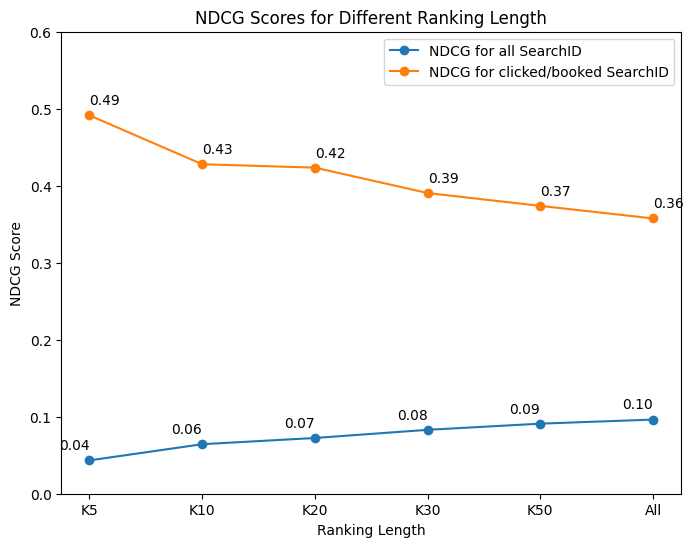

In [214]:
plt.figure(figsize=(8,6))

x = results_df['Number Features']
y1 = results_df['NDCG for all SearchID']
y2 = results_df['NDCG for clicked SearchID']

plt.plot(x, y1,marker='o', label='NDCG for all SearchID')
plt.plot(x, y2,marker='o', label='NDCG for clicked/booked SearchID')

plt.xlabel('Ranking Length')
plt.ylabel('NDCG Score')
plt.title('NDCG Scores for Different Ranking Length')

plt.ylim(0,0.6)

plt.legend()

for i, txt in enumerate(y1):
    plt.text(x[i], y1[i]+0.01, f'{txt:.2f}', ha='right', va='bottom')

for i, txt in enumerate(y2):
    plt.text(x[i], y2[i]+0.01, f'{txt:.2f}', ha='left', va='bottom')

plt.savefig('plot_comparison_xgb.png')

plt.show()

In [118]:
unique_search_ids = df_merged['search_id'].unique()
id_mapping = {search_id: i for i, search_id in enumerate(unique_search_ids)}
df_merged['search_id'] = df_merged['search_id'].map(id_mapping)

In [119]:
grouped_df_original = df_merged.groupby('search_id', group_keys=False).apply(lambda x: x.sort_values(by='rank', ascending=True))

grouped_df_original.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,rank,prop_id,is_travel_ad,review_rating,review_count,star_rating,is_free_cancellation,is_drr,price_bucket,num_clicks,is_trans,AirConditioning,AirportTransfer,Bar,FreeAirportTransportation,FreeBreakfast,FreeParking,FreeWiFi,Gym,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi
0,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,1,5695234,1,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,2,1734546,1,4.0,1000.0,2.0,1,0,4.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,3,5675938,0,5.0,700.0,3.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,4,5695234,0,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,5,2012023,0,4.0,625.0,2.0,0,0,1.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [124]:
value_counts = grouped_df_original['search_id'].value_counts()
filtered_values = value_counts[value_counts > 1]
filtered_df = grouped_df_original[grouped_df_original['search_id'].isin(filtered_values.index)]

In [ ]:
#All Values
def compute_ndcg(relevance_scores):
    if not relevance_scores:
        return 0

    # Compute the DCG
    dcg = relevance_scores[0]
    for i in range(1, len(relevance_scores)):
        dcg += relevance_scores[i] / np.log2(i + 1)

    # Compute the ideal DCG (IDCG)
    ideal_scores = sorted(relevance_scores, reverse=True)
    idcg = ideal_scores[0]
    for i in range(1, len(ideal_scores)):
        idcg += ideal_scores[i] / np.log2(i + 1)

    # Calculate NDCG
    if idcg == 0:
        return 0  # Prevent division by zero
    ndcg = dcg / idcg
    return ndcg


In [140]:
ndcg_scores_2=[]
for i in set(filtered_df['search_id']):
  search_data = filtered_df[filtered_df['search_id'] == i]
  ndcg_scores_2.append(compute_ndcg(search_data["num_clicks"].tolist()))

In [134]:
np.mean(ndcg_scores_2)

0.14520243296115296

In [135]:
ndcg_scores_nz = [i for i in ndcg_scores_2 if i != 0]
np.mean(ndcg_scores_nz)

0.6411976595714465

In [166]:
#K Values
def compute_ndcg_at_k(relevance_scores, k=30):
    if relevance_scores.empty:
        return 0  # Return 0 if the relevance_scores Series is empty

    relevance_scores = relevance_scores.tolist()

    # Truncate to top k scores
    relevance_scores = relevance_scores[:k]

    # Compute the DCG
    dcg = relevance_scores[0]
    for i in range(1, len(relevance_scores)):
        dcg += relevance_scores[i] / np.log2(i + 1)

    # Compute the ideal DCG (IDCG)
    ideal_scores = sorted(relevance_scores, reverse=True)
    idcg = ideal_scores[0]
    for i in range(1, len(ideal_scores)):
        idcg += ideal_scores[i] / np.log2(i + 1)

    # Calculate NDCG
    if idcg == 0:
        return 0  # Prevent division by zero
    ndcg = dcg / idcg
    return ndcg

In [167]:
ndcg_scores_2=[]
for i in set(filtered_df['search_id']):
  search_data = filtered_df[filtered_df['search_id'] == i]
  ndcg_scores_2.append(compute_ndcg_at_k(search_data["num_clicks"]))

In [168]:
np.mean(ndcg_scores_2)

0.14539115576392989

In [169]:
ndcg_scores_nz = [i for i in ndcg_scores_2 if i != 0]
np.mean(ndcg_scores_nz)

0.6702177668142135

In [192]:
k_s_original = ['K5', 'K10', 'K20', 'K30', 'K50', 'All']
zeros_original = [0.1368, 0.1453, 0.1453, 0.1454, 0.1447, 0.1452]
no_zeros_original = [0.8794, 0.7589, 0.6832, 0.6702, 0.6512, 0.6412]

In [193]:
original_results_df = pd.DataFrame({'Number Features': k_s_original, 'NDCG for all SearchID': zeros_original, 'NDCG for clicked SearchID': no_zeros_original})
original_results_df.head()

,Number Features,NDCG for all SearchID,NDCG for clicked SearchID
0,K5,0.1368,0.8794
1,K10,0.1453,0.7589
2,K20,0.1453,0.6832
3,K30,0.1454,0.6702
4,K50,0.1447,0.6512


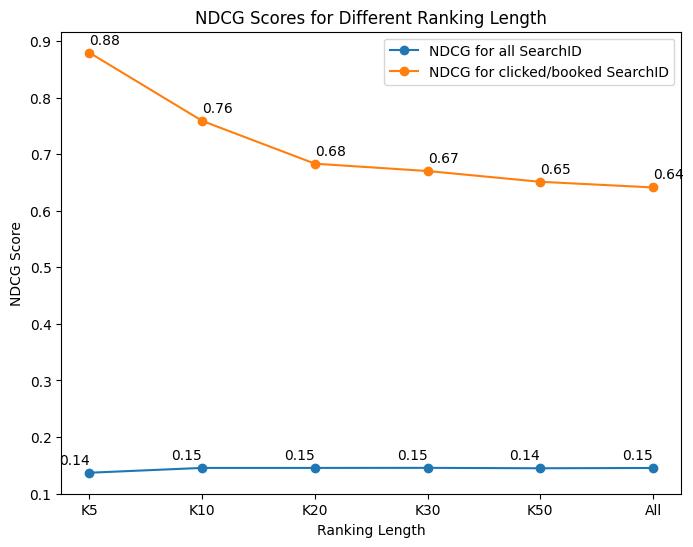

In [213]:
plt.figure(figsize=(8,6))

x = original_results_df['Number Features']
y1 = original_results_df['NDCG for all SearchID']
y2 = original_results_df['NDCG for clicked SearchID']

plt.plot(x, y1, marker='o', label='NDCG for all SearchID')
plt.plot(x, y2, marker='o', label='NDCG for clicked/booked SearchID')

plt.xlabel('Ranking Length')
plt.ylabel('NDCG Score')
plt.title('NDCG Scores for Different Ranking Length')

plt.legend()

for i, txt in enumerate(y1):
    plt.text(x[i], y1[i]+0.01, f'{txt:.2f}', ha='right', va='bottom')

for i, txt in enumerate(y2):
    plt.text(x[i], y2[i]+0.01, f'{txt:.2f}', ha='left', va='bottom')

plt.savefig('plot_comparison_df.png')

plt.show()

In [195]:
original_results_df = pd.DataFrame({'Number Features': k_s_original, 'NDCG for all SearchID': zeros_original, 'NDCG for clicked SearchID': no_zeros_original})
results_df = pd.DataFrame({'Number Features': k_s, 'NDCG for all SearchID': zeros_k, 'NDCG for clicked SearchID': no_zeros_k})

In [196]:
results_df

,Number Features,NDCG for all SearchID,NDCG for clicked SearchID
0,K5,0.0433,0.4914
1,K10,0.0643,0.4279
2,K20,0.0724,0.4235
3,K30,0.0830,0.3905
4,K50,0.0910,0.3738
5,All,0.0963,0.3575


In [197]:
original_results_df

,Number Features,NDCG for all SearchID,NDCG for clicked SearchID
0,K5,0.1368,0.8794
1,K10,0.1453,0.7589
2,K20,0.1453,0.6832
3,K30,0.1454,0.6702
4,K50,0.1447,0.6512
5,All,0.1452,0.6412


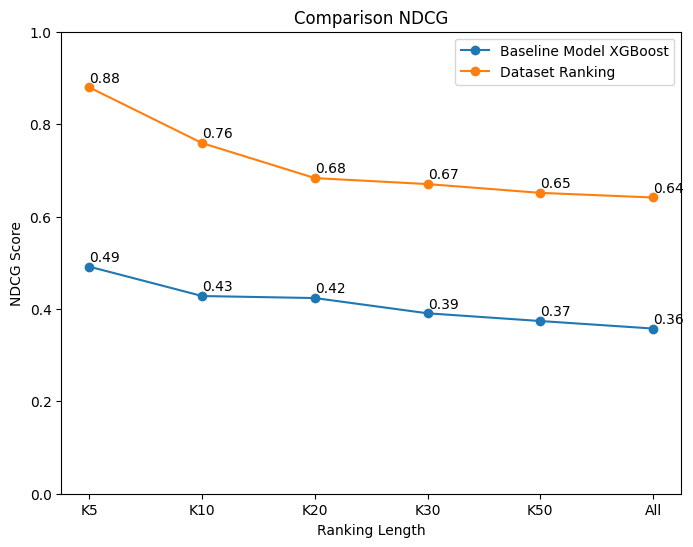

In [216]:
plt.figure(figsize=(8,6))

x1 = results_df['Number Features']
y1 = results_df['NDCG for clicked SearchID']

x2 = original_results_df['Number Features']
y2 = original_results_df['NDCG for clicked SearchID']

plt.plot(x1, y1, marker='o', label='Baseline Model XGBoost')
plt.plot(x2, y2, marker='o', label='Dataset Ranking')

plt.xlabel('Ranking Length')
plt.ylabel('NDCG Score')
plt.title('Comparison NDCG')

plt.legend()

for i, txt in enumerate(y1):
    plt.text(x1[i], y1[i]+0.005, f'{txt:.2f}', ha='left', va='bottom')

for i, txt in enumerate(y2):
    plt.text(x2[i], y2[i]+0.005, f'{txt:.2f}', ha='left', va='bottom')

plt.ylim(0,1)

plt.savefig('plot_comparison_df_xgb1.png')

plt.show()

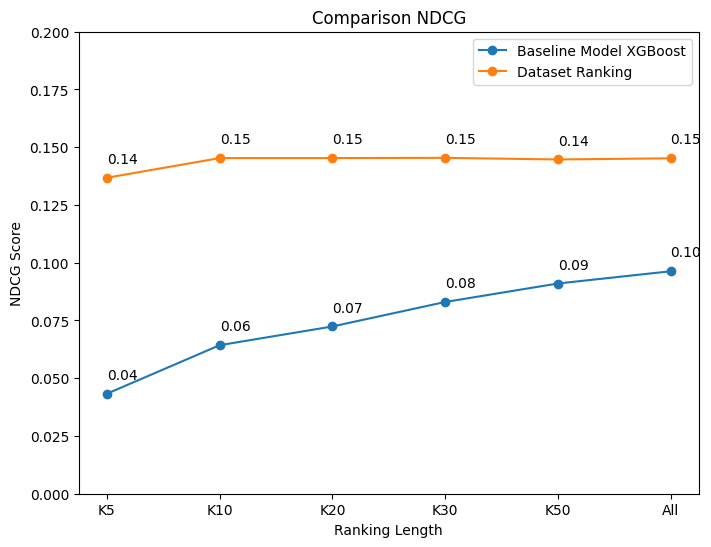

In [212]:
plt.figure(figsize=(8,6))

x1 = results_df['Number Features']
y1 = results_df['NDCG for all SearchID']

x2 = original_results_df['Number Features']
y2 = original_results_df['NDCG for all SearchID']

plt.plot(x1, y1, marker='o', label='Baseline Model XGBoost')
plt.plot(x2, y2, marker='o', label='Dataset Ranking')

plt.xlabel('Ranking Length')
plt.ylabel('NDCG Score')
plt.title('Comparison NDCG')

plt.ylim(0,0.2)

plt.legend()

for i, txt in enumerate(y1):
    plt.text(x1[i], y1[i]+0.005, f'{txt:.2f}', ha='left', va='bottom')

for i, txt in enumerate(y2):
    plt.text(x2[i], y2[i]+0.005, f'{txt:.2f}', ha='left', va='bottom')

plt.savefig('plot_comparison_df_xgb2.png')

plt.show()

In [116]:
df_merged.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,rank,prop_id,is_travel_ad,review_rating,review_count,star_rating,is_free_cancellation,is_drr,price_bucket,num_clicks,is_trans,AirConditioning,AirportTransfer,Bar,FreeAirportTransportation,FreeBreakfast,FreeParking,FreeWiFi,Gym,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,1,5695234,1,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,2,1734546,1,4.0,1000.0,2.0,1,0,4.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,3,5675938,0,5.0,700.0,3.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,4,5695234,0,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,5,2012023,0,4.0,625.0,2.0,0,0,1.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
unique_search_ids = df_merged['search_id'].unique()
id_mapping = {search_id: i for i, search_id in enumerate(unique_search_ids)}
df_merged['search_id'] = df_merged['search_id'].map(id_mapping)
df_merged.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,rank,prop_id,is_travel_ad,review_rating,review_count,star_rating,is_free_cancellation,is_drr,price_bucket,num_clicks,is_trans,AirConditioning,AirportTransfer,Bar,FreeAirportTransportation,FreeBreakfast,FreeParking,FreeWiFi,Gym,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi
0,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,1,5695234,1,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,2,1734546,1,4.0,1000.0,2.0,1,0,4.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,3,5675938,0,5.0,700.0,3.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,4,5695234,0,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,001bbff3030c95740d4c55bb72e823e9,0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,0,5,2012023,0,4.0,625.0,2.0,0,0,1.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
true_relevance = y_val.sort_values(ascending=False)
relevance_score = y_test_df.sort_values("predicted_ranking", ascending=False)

In [ ]:
print(
        "nDCG score: ",
        ndcg_score(
            [true_relevance.to_numpy()], [relevance_score["relevance_score"].to_numpy()]
        ),
    )

print(
        "nDCG score @ 5: ",
        ndcg_score(
            y_true = [true_relevance.to_numpy()], y_score = [relevance_score["relevance_score"].to_numpy()], k=5
        ),
    )

print(
        "nDCG score @ 10: ",
        ndcg_score(
            y_true = [true_relevance.to_numpy()], y_score = [relevance_score["relevance_score"].to_numpy()], k=10
        ),
    )

print(
        "nDCG score @ 50: ",
        ndcg_score(
            y_true = [true_relevance.to_numpy()], y_score = [relevance_score["relevance_score"].to_numpy()], k=50
        ),
    )

nDCG score:  0.31985913076014977
nDCG score @ 5:  0.0
nDCG score @ 10:  0.0
nDCG score @ 50:  0.0


In [ ]:
len(predictions)

15838

In [ ]:
len(y_val)


15838

In [ ]:
np.mean(predictions)

-0.31356892

In [112]:
g = train_df.groupby(by="search_id")
size = g.size()
group_train = size.to_list()

g = test_df.groupby(by="search_id")
size = g.size()
group_valid = size.to_list()

In [113]:
ranker = xgb.XGBRanker(
        n_estimators=100,
        learning_rate=0.1,
        objective='rank:ndcg',
        reg_lambda=0.05,
        # verbose = True,
        #tree_method = 'gpu_hist'
    )

ranker.fit(
    X_train.astype(float),
    y_train.astype(int),
    group=group_train,
    eval_group=[group_valid],
    eval_set=[(X_val.astype(float), y_val.astype(int))],
    early_stopping_rounds=100,
    verbose = True
)

[0]	validation_0-ndcg@32:0.83447
[1]	validation_0-ndcg@32:0.82583
[2]	validation_0-ndcg@32:0.83291
[3]	validation_0-ndcg@32:0.83484
[4]	validation_0-ndcg@32:0.83460
[5]	validation_0-ndcg@32:0.83065
[6]	validation_0-ndcg@32:0.83096
[7]	validation_0-ndcg@32:0.82984
[8]	validation_0-ndcg@32:0.82748
[9]	validation_0-ndcg@32:0.82861
[10]	validation_0-ndcg@32:0.82548
[11]	validation_0-ndcg@32:0.82836
[12]	validation_0-ndcg@32:0.82726
[13]	validation_0-ndcg@32:0.82528
[14]	validation_0-ndcg@32:0.82392
[15]	validation_0-ndcg@32:0.82482
[16]	validation_0-ndcg@32:0.82439
[17]	validation_0-ndcg@32:0.82142
[18]	validation_0-ndcg@32:0.82311
[19]	validation_0-ndcg@32:0.82171


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-ndcg@32:0.81883
[21]	validation_0-ndcg@32:0.81986
[22]	validation_0-ndcg@32:0.81968
[23]	validation_0-ndcg@32:0.82090
[24]	validation_0-ndcg@32:0.82309
[25]	validation_0-ndcg@32:0.82038
[26]	validation_0-ndcg@32:0.81914
[27]	validation_0-ndcg@32:0.81795
[28]	validation_0-ndcg@32:0.81932
[29]	validation_0-ndcg@32:0.82104
[30]	validation_0-ndcg@32:0.82150
[31]	validation_0-ndcg@32:0.82341
[32]	validation_0-ndcg@32:0.82252
[33]	validation_0-ndcg@32:0.82430
[34]	validation_0-ndcg@32:0.82438
[35]	validation_0-ndcg@32:0.82531
[36]	validation_0-ndcg@32:0.82523
[37]	validation_0-ndcg@32:0.82431
[38]	validation_0-ndcg@32:0.82551
[39]	validation_0-ndcg@32:0.82437
[40]	validation_0-ndcg@32:0.82460
[41]	validation_0-ndcg@32:0.82339
[42]	validation_0-ndcg@32:0.82353
[43]	validation_0-ndcg@32:0.82295
[44]	validation_0-ndcg@32:0.82308
[45]	validation_0-ndcg@32:0.82368
[46]	validation_0-ndcg@32:0.82496
[47]	validation_0-ndcg@32:0.82409
[48]	validation_0-ndcg@32:0.82423
[49]	validatio

XGBRanker(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
          colsample_bynode=None, colsample_bytree=None, device=None,
          early_stopping_rounds=None, enable_categorical=False,
          eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
          importance_type=None, interaction_constraints=None, learning_rate=0.1,
          max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
          max_delta_step=None, max_depth=None, max_leaves=None,
          min_child_weight=None, missing=nan, monotone_constraints=None,
          multi_strategy=None, n_estimators=100, n_jobs=None,
          num_parallel_tree=None, random_state=None, ...)

In [114]:
X_val.head()

,price_bucket,review_rating,review_count,star_rating
0,0.412562,0.200383,-0.270451,-0.357492
1,0.977568,0.200383,0.208359,-0.357492
2,0.412562,0.844620,0.016835,0.231311
3,0.412562,0.200383,-0.270451,-0.357492
4,-0.717449,0.200383,-0.031046,-0.357492


In [115]:
val_pred = ranker.predict(X_val.astype(float))
y_test_df = pd.DataFrame({"relevance_score": y_val, "predicted_ranking": val_pred})
print(y_val[:10])
print(val_pred[:10])

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    1
9    0
Name: relevance, dtype: int64
[ 0.02755123 -0.15443441  0.08293352  0.02755123 -0.09146552  0.01988789
 -0.01346307 -0.15443441  0.02827108 -0.09383746]


In [ ]:
y_test_df.head()

,relevance_score,predicted_ranking
0,0,0.027551
1,0,-0.154434
2,0,0.082934
3,0,0.027551
4,0,-0.091466


In [ ]:
sorted_indices = np.argsort(val_pred)[::-1]  # Sort indices in descending order of predicted scores
sorted_val_pred = val_pred[sorted_indices]   # Sort predicted scores
sorted_y_val = y_val[sorted_indices]         # Sort true relevance scores accordingly

# Print top N items and their relevance scores
top_n = 10
print("Top", top_n, "predicted rankings:")
for i in range(top_n):
    print("Relevance Score:", sorted_y_val[i], "| Predicted Ranking Score:", sorted_val_pred[i])

Top 10 predicted rankings:
Relevance Score: 0 | Predicted Ranking Score: 0.34608346
Relevance Score: 0 | Predicted Ranking Score: 0.29602152
Relevance Score: 0 | Predicted Ranking Score: 0.29602152
Relevance Score: 0 | Predicted Ranking Score: 0.29602152
Relevance Score: 0 | Predicted Ranking Score: 0.29602152
Relevance Score: 0 | Predicted Ranking Score: 0.28766364
Relevance Score: 1 | Predicted Ranking Score: 0.28766364
Relevance Score: 0 | Predicted Ranking Score: 0.28766364
Relevance Score: 1 | Predicted Ranking Score: 0.28766364
Relevance Score: 0 | Predicted Ranking Score: 0.28766364


In [ ]:
y_test_df[y_test_df['relevance_score'] >= 4]

,relevance_score,predicted_ranking
11,4,0.038394
3698,5,0.002667


In [ ]:
y_train.value_counts()

relevance
0    54985
1      359
3       98
2       18
4        6
5        2
7        1
Name: count, dtype: int64

In [ ]:
y_val.value_counts()

relevance
0    15761
1       62
2        8
3        5
4        1
5        1
Name: count, dtype: int64

In [ ]:
true_relevance = y_val.sort_values(ascending=False)
relevance_score = y_test_df.sort_values("predicted_ranking", ascending=False)

In [ ]:
true_relevance

3698     5
11       4
8733     3
3159     3
11424    3
        ..
5302     0
5303     0
5304     0
5305     0
15837    0
Name: relevance, Length: 15838, dtype: int64

In [ ]:
relevance_score

,relevance_score,predicted_ranking
11252,0,0.095782
269,0,0.095782
8764,0,0.095782
7543,0,0.095782
6337,0,0.095782
...,...,...
6044,0,-0.099343
6045,0,-0.099343
6048,0,-0.099343
6049,0,-0.099343


In [ ]:
relevance_score['relevance_score'].value_counts()

relevance_score
0    15761
1       62
2        8
3        5
4        1
5        1
Name: count, dtype: int64

In [ ]:
import numpy as np
from sklearn.metrics import ndcg_score

In [ ]:
print(
        "nDCG score: ",
        ndcg_score(
            [true_relevance.to_numpy()], [relevance_score["relevance_score"].to_numpy()]
        ),
    )

print(
        "nDCG score @ 5: ",
        ndcg_score(
            y_true = [true_relevance.to_numpy()], y_score = [relevance_score["relevance_score"].to_numpy()], k=5
        ),
    )

print(
        "nDCG score @ 10: ",
        ndcg_score(
            y_true = [true_relevance.to_numpy()], y_score = [relevance_score["relevance_score"].to_numpy()], k=10
        ),
    )

print(
        "nDCG score @ 50: ",
        ndcg_score(
            y_true = [true_relevance.to_numpy()], y_score = [relevance_score["relevance_score"].to_numpy()], k=50
        ),
    )

nDCG score:  0.2793246978775557
nDCG score @ 5:  0.0
nDCG score @ 10:  0.0
nDCG score @ 50:  0.0


#SOME VISUALIZATIONS

In [ ]:
count_rank = df_merged.groupby('rank').sum()
count_rank

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,prop_id,is_travel_ad,review_rating,review_count,star_rating,is_free_cancellation,is_drr,price_bucket,num_clicks,is_trans,AirConditioning,AirportTransfer,Bar,FreeAirportTransportation,FreeBreakfast,FreeParking,FreeWiFi,Gym,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi
rank,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,001bbff3030c95740d4c55bb72e823e9002ba2a7c74dbf...,541933a931216d270f53277c2de068d025b8ebecb15b8f...,2021-07-02T19:38:00.000Z2021-06-23T03:39:00.00...,3695,5721,450,3823271,2021-07-042021-09-102021-07-072021-08-252021-0...,2021-07-052021-09-142021-07-122021-08-282021-0...,2065,187,2,1010,RECOMMENDEDPRICE ASCENDINGRECOMMENDEDRECOMMEND...,VIPONLY:FALSEPRICE:0VIPONLY:FALSEMEALPLAN:ALL_...,3510791490,352,3954.0,1142025.0,3383.0,592,562,2785.0,105,11,455.0,129.0,656.0,56.0,225.0,585.0,896.0,615.0,239.0,252.0,781.0,325.0,335.0,8.0,283.0,443.0,28.0,108.0
2,001bbff3030c95740d4c55bb72e823e900c5152ed6ef5b...,541933a931216d270f53277c2de068d0349c86ff1be415...,2021-07-02T19:38:00.000Z2021-06-10T00:08:00.00...,3616,5590,438,3699140,2021-07-042021-07-072021-08-252021-08-302021-0...,2021-07-052021-07-122021-08-282021-09-042021-0...,1960,172,2,958,RECOMMENDEDRECOMMENDEDRECOMMENDEDRECOMMENDEDRE...,VIPONLY:FALSEPRICE:0VIPONLY:FALSEMEALPLAN:ALL_...,3216297872,349,3836.0,1150625.0,3207.0,604,524,2746.0,40,3,379.0,143.0,569.0,39.0,259.0,536.0,865.0,575.0,244.0,247.0,744.0,322.0,358.0,5.0,268.0,422.0,31.0,73.0
3,001bbff3030c95740d4c55bb72e823e900c5152ed6ef5b...,541933a931216d270f53277c2de068d0349c86ff1be415...,2021-07-02T19:38:00.000Z2021-06-10T00:08:00.00...,3599,5481,435,3646577,2021-07-042021-07-072021-08-252021-08-302021-0...,2021-07-052021-07-122021-08-282021-09-042021-0...,1937,168,2,947,RECOMMENDEDRECOMMENDEDRECOMMENDEDRECOMMENDEDRE...,VIPONLY:FALSEPRICE:0VIPONLY:FALSEMEALPLAN:ALL_...,3198227936,213,3815.0,1215250.0,3191.0,573,536,2695.0,24,3,386.0,118.0,583.0,64.0,233.0,508.0,859.0,563.0,248.0,237.0,734.0,313.0,358.0,7.0,259.0,414.0,26.0,81.0
4,001bbff3030c95740d4c55bb72e823e900c5152ed6ef5b...,541933a931216d270f53277c2de068d0349c86ff1be415...,2021-07-02T19:38:00.000Z2021-06-10T00:08:00.00...,3419,5330,424,3475611,2021-07-042021-07-072021-08-252021-08-302021-0...,2021-07-052021-07-122021-08-282021-09-042021-0...,1900,160,2,930,RECOMMENDEDRECOMMENDEDRECOMMENDEDRECOMMENDEDRE...,VIPONLY:FALSEPRICE:0VIPONLY:FALSEMEALPLAN:ALL_...,3073893109,151,3691.0,1043075.0,3075.0,597,542,2682.0,24,3,414.0,126.0,523.0,70.0,211.0,520.0,825.0,520.0,247.0,227.0,705.0,274.0,319.0,7.0,233.0,406.0,28.0,78.0
5,001bbff3030c95740d4c55bb72e823e900c5152ed6ef5b...,541933a931216d270f53277c2de068d0349c86ff1be415...,2021-07-02T19:38:00.000Z2021-06-10T00:08:00.00...,3380,5058,421,3335597,2021-07-042021-07-072021-08-252021-08-302021-0...,2021-07-052021-07-122021-08-282021-09-042021-0...,1882,158,2,921,RECOMMENDEDRECOMMENDEDRECOMMENDEDRECOMMENDEDRE...,VIPONLY:FALSEPRICE:0VIPONLY:FALSEMEALPLAN:ALL_...,3214998525,51,3690.0,996050.0,2948.0,587,529,2589.0,29,1,392.0,106.0,496.0,54.0,220.0,512.0,812.0,497.0,205.0,227.0,678.0,267.0,314.0,4.0,218.0,373.0,28.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,001bbff3030c95740d4c55bb72e823e900c5152ed6ef5b...,541933a931216d270f53277c2de068d0349c86ff1be415...,2021-07-02T19:38:00.000Z2021-06-10T00:08:00.00...,2130,2974,243,1433517,2021-07-042021-07-072021-08-252021-08-302021-0...,2021-07-052021-07-122021-08-282021-09-042021-0...,1122,108,0,540,RECOMMENDEDRECOMMENDEDRECOMMENDEDRECOMMENDEDRE...,VIPONLY:FALSEPRICE:0VIPONLY:FALSEAMENITY:72STA...,1875764781,0,1873.0,192275.0,1039.0,195,146,909.0,2,1,235.0,36.0,129.0,13.0,81.0,178.0,345.0,13

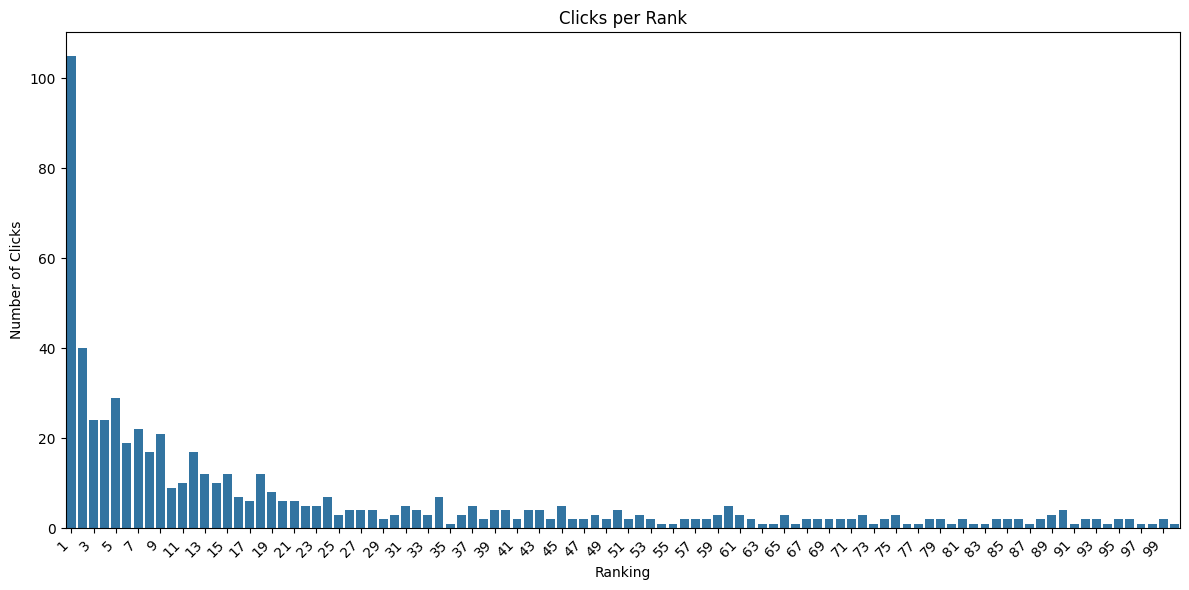

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=count_rank.index, y=count_rank['num_clicks'])
n=2
plt.xticks(range(0,len(count_rank.index),n),rotation=45, ha='right')
plt.title('Clicks per Rank')
plt.xlabel('Ranking')
plt.ylabel('Number of Clicks')
plt.tight_layout()
plt.show()

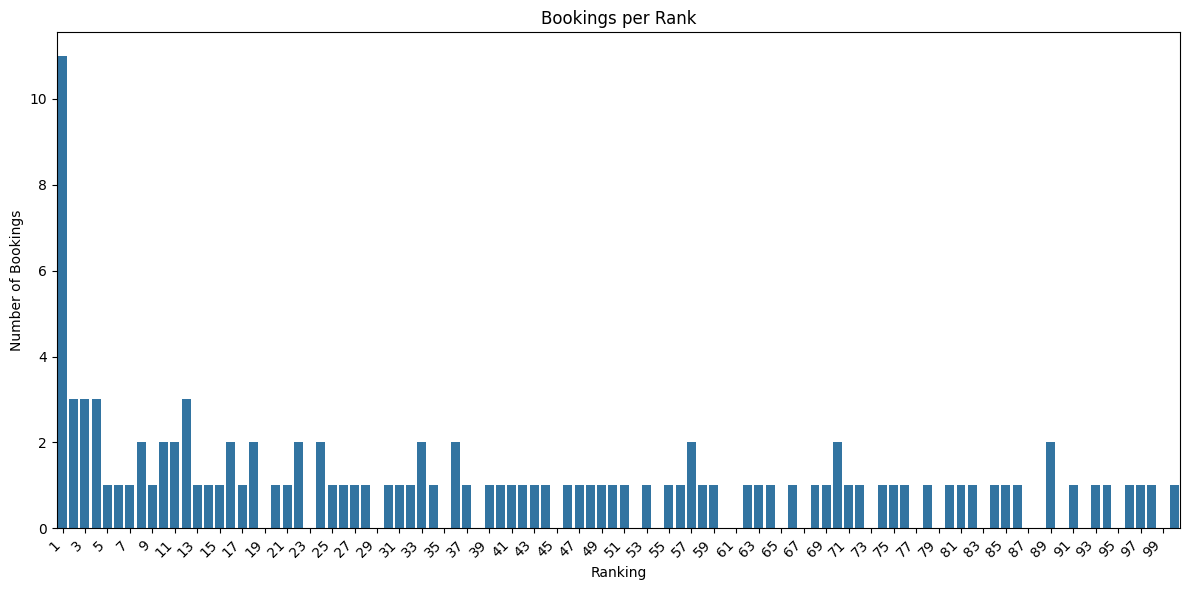

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=count_rank.index, y=count_rank['is_trans'])
n=2
plt.xticks(range(0,len(count_rank.index),n),rotation=45, ha='right')
plt.title('Bookings per Rank')
plt.xlabel('Ranking')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

In [ ]:
grouped_rr = df_merged.groupby('review_rating').sum()
grouped_rr.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,rank,prop_id,is_travel_ad,review_count,star_rating,is_free_cancellation,is_drr,price_bucket,num_clicks,is_trans,AirConditioning,AirportTransfer,Bar,FreeAirportTransportation,FreeBreakfast,FreeParking,FreeWiFi,Gym,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi
review_rating,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,001bbff3030c95740d4c55bb72e823e9001bbff3030c95...,541933a931216d270f53277c2de068d0541933a931216d...,2021-07-02T19:38:00.000Z2021-07-02T19:38:00.00...,41834,66207,4838,62846078,2021-07-042021-07-042021-07-042021-07-042021-0...,2021-07-052021-07-052021-07-052021-07-052021-0...,19828,2245,2,9624,RECOMMENDEDRECOMMENDEDRECOMMENDEDRECOMMENDEDRE...,VIPONLY:FALSEPRICE:0PRICE:0PRICE:0PRICE:0PRICE...,523774,34059951634,16,0.0,10066.0,2598,1152,15146.0,11,0,2949.0,220.0,319.0,120.0,366.0,2308.0,3699.0,1094.0,184.0,755.0,845.0,383.0,1553.0,359.0,246.0,2091.0,567.0,113.0
1.0,0152236295041a611d45ed97353d73df017a2c4b88aee8...,02e111bc0c86ce83b159f0617b98920d61d994c9a6c3b6...,2021-06-10T14:53:00.000Z2021-07-31T23:09:00.00...,985,2827,65,939060,2021-06-102021-08-042021-06-182021-08-022021-0...,2021-06-112021-08-052021-06-192021-08-032021-0...,348,23,0,154,PRICE ASCENDINGRECOMMENDEDRECOMMENDEDRECOMMEND...,VIPONLY:FALSEVIPONLY:FALSEPRICE:0AMENITY:19|AM...,9255,485119654,2,3850.0,267.0,33,29,246.0,0,0,69.0,18.0,16.0,3.0,8.0,55.0,87.0,14.0,8.0,9.0,46.0,21.0,31.0,3.0,10.0,29.0,10.0,3.0
2.0,001bbff3030c95740d4c55bb72e823e9013f92616fe583...,541933a931216d270f53277c2de068d0a359fd984e5ae5...,2021-07-02T19:38:00.000Z2021-07-07T20:49:00.00...,1685,4022,332,2141437,2021-07-042021-08-302021-08-302021-08-302021-0...,2021-07-052021-09-042021-09-042021-09-042021-0...,1179,39,0,638,RECOMMENDEDRECOMMENDEDRECOMMENDEDRECOMMENDEDRE...,VIPONLY:FALSEVIPONLY:FALSEVIPONLY:FALSEVIPONLY...,32591,2133213298,12,199625.0,1442.0,291,245,889.0,0,0,414.0,47.0,67.0,14.0,66.0,422.0,560.0,68.0,35.0,59.0,268.0,115.0,236.0,2.0,16.0,155.0,15.0,25.0
3.0,001bbff3030c95740d4c55bb72e823e9001bbff3030c95...,541933a931216d270f53277c2de068d0541933a931216d...,2021-07-02T19:38:00.000Z2021-07-02T19:38:00.00...,14851,29378,2733,14882177,2021-07-042021-07-042021-07-042021-07-042021-0...,2021-07-052021-07-052021-07-052021-07-052021-0...,9992,617,4,5340,RECOMMENDEDRECOMMENDEDRECOMMENDEDRECOMMENDEDRE...,VIPONLY:FALSEVIPONLY:FALSEVIPONLY:FALSEVIPONLY...,244762,18159465647,177,4182425.0,13024.0,2803,2387,8091.0,40,4,2802.0,380.0,1107.0,135.0,1085.0,3806.0,4926.0,967.0,437.0,534.0,3211.0,819.0,2178.0,35.0,275.0,1620.0,112.0,211.0
4.0,001bbff3030c95740d4c55bb72e823e9001bbff3030c95...,541933a931216d270f53277c2de068d0541933a931216d...,2021-07-02T19:38:00.000Z2021-07-02T19:38:00.00...,123453,185629,15136,74108682,2021-07-042021-07-042021-07-042021-07-042021-0...,2021-07-052021-07-052021-07-052021-07-052021-0...,69357,5886,79,33948,RECOMMENDEDRECOMMENDEDRECOMMENDEDRECOMMENDEDRE...,VIPONLY:FALSEVIPONLY:FALSEVIPONLY:FALSEVIPONLY...,1365720,118590970652,1722,34100650.0,109202.0,18789,17533,84177.0,428,87,14795.0,4051.0,18012.0,2206.0,8522.0,18026.0,30722.0,18420.0,7960.0,7182.0,25990.0,10796.0,11707.0,177.0,6403.0,14625.0,1240.0,2805.0


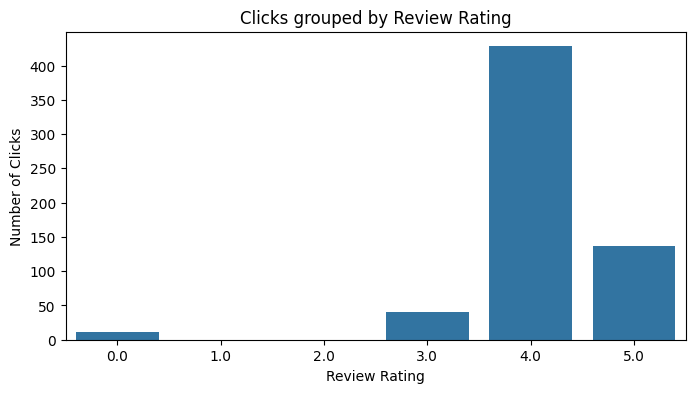

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x=grouped_rr.index, y=grouped_rr['num_clicks'])
plt.xlabel('Review Rating')
plt.ylabel('Number of Clicks')
plt.title('Clicks grouped by Review Rating')
plt.show()

In [ ]:
grouped_rr = df_merged.groupby('review_rating').agg({'num_clicks':'mean'})
grouped_rr.head()

,num_clicks
review_rating,
0.0,0.001146
1.0,0.000000
2.0,0.000000
3.0,0.007520
4.0,0.012731


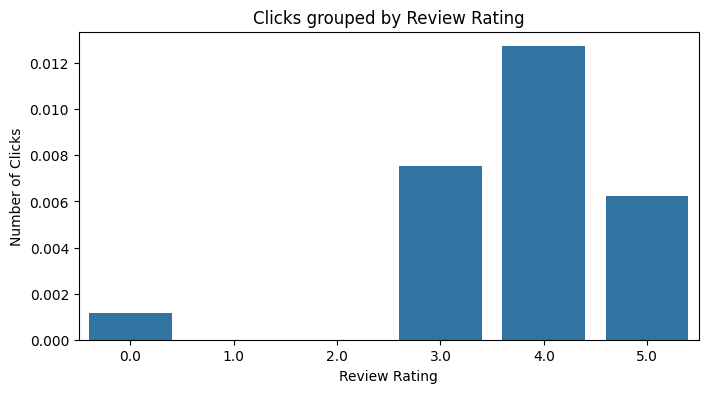

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x=grouped_rr.index, y=grouped_rr['num_clicks'])
plt.xlabel('Review Rating')
plt.ylabel('Number of Clicks')
plt.title('Clicks grouped by Review Rating')
plt.show()

In [ ]:
df_pb = df_merged.groupby('price_bucket').sum()

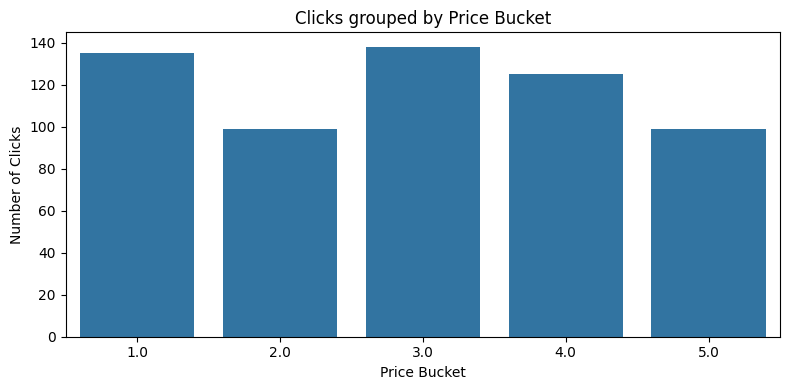

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x=df_pb.index, y=df_pb['num_clicks'])
plt.xlabel('Price Bucket')
plt.ylabel('Number of Clicks')
plt.title('Clicks grouped by Price Bucket')
plt.tight_layout()
plt.show()

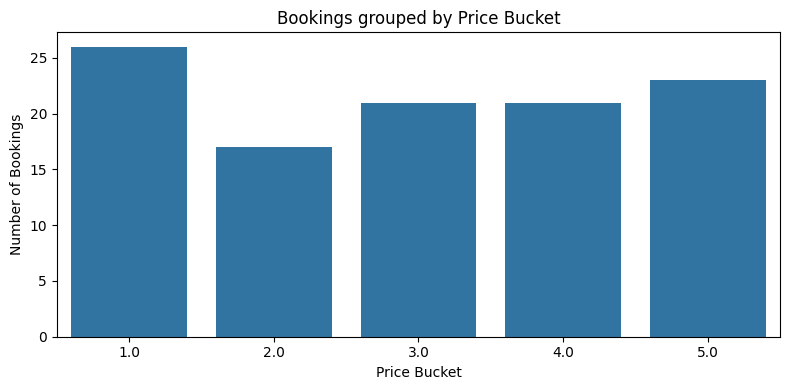

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x=df_pb.index, y=df_pb['is_trans'])
plt.xlabel('Price Bucket')
plt.ylabel('Number of Bookings')
plt.title('Bookings grouped by Price Bucket')
plt.tight_layout()
plt.show()

In [ ]:
click_counts = df_merged.groupby('price_bucket')['num_clicks'].sum().reset_index()
click_counts

,price_bucket,num_clicks
0,1.0,135
1,2.0,99
2,3.0,138
3,4.0,125
4,5.0,99


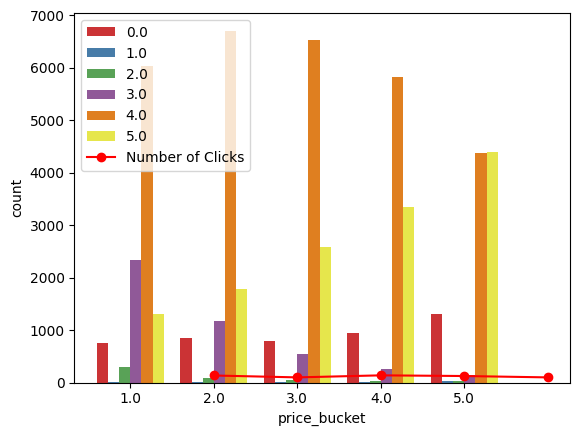

In [ ]:
sns.countplot(x='price_bucket', hue='review_rating', data=df_merged, palette='Set1', dodge=True)

plt.plot(click_counts['price_bucket'], click_counts['num_clicks'], marker='o', color='red', label='Number of Clicks')

plt.legend()

plt.show()

In [ ]:
df2 = df_merged.groupby('prop_id')['num_clicks'].sum()
df2 = df2.sort_values(ascending=False)
df2.head()


prop_id
1879505    9
2421824    7
6562724    6
4189323    6
1214332    6
Name: num_clicks, dtype: int64

In [ ]:
df_merged.head()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,rank,prop_id,is_travel_ad,review_rating,review_count,star_rating,is_free_cancellation,is_drr,price_bucket,num_clicks,is_trans,AirConditioning,AirportTransfer,Bar,FreeAirportTransportation,FreeBreakfast,FreeParking,FreeWiFi,Gym,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,1,5695234,1,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,2,1734546,1,4.0,1000.0,2.0,1,0,4.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,3,5675938,0,5.0,700.0,3.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,4,5695234,0,4.0,250.0,2.0,1,0,3.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,5,2012023,0,4.0,625.0,2.0,0,0,1.0,0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_merged.shape

(71307, 44)

In [ ]:
df_merged['sort_type'].value_counts()

sort_type
RECOMMENDED                      67251
PRICE ASCENDING                   2320
GUEST RATINGS DESCENDING           685
SPECIAL - DIRECT HOTEL SEARCH      546
STAR RATING DESCENDING             400
VACATION RENTAL                    105
Name: count, dtype: int64